In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [3]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
import os 
os.getcwd()
os.chdir('/home/telraswa/Desktop/Swapnil/manju_project/Brain_tumor')
print(os.getcwd())

/home/telraswa/Desktop/Swapnil/manju_project/Brain_tumor


In [6]:
training_set = train_datagen.flow_from_directory('/home/telraswa/Desktop/Swapnil/manju_project/Brain_tumor/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/home/telraswa/Desktop/Swapnil/manju_project/Brain_tumor/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 22 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
     

Epoch 1/100
1/1 [==============================] - 0s 265ms/step - loss: 0.6989 - acc: 0.4545 - val_loss: 0.6783 - val_acc: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 85ms/step - loss: 0.7245 - acc: 0.5909 - val_loss: 0.6657 - val_acc: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 92ms/step - loss: 0.6643 - acc: 0.5909 - val_loss: 0.6835 - val_acc: 0.7143
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 0.6570 - acc: 0.6364 - val_loss: 0.6919 - val_acc: 0.4286
Epoch 5/100
1/1 [==============================] - 0s 95ms/step - loss: 0.6660 - acc: 0.6364 - val_loss: 0.6866 - val_acc: 0.4286
Epoch 6/100
1/1 [==============================] - 0s 101ms/step - loss: 0.6521 - acc: 0.5909 - val_loss: 0.6723 - val_acc: 0.4286
Epoch 7/100
1/1 [==============================] - 0s 102ms/step - loss: 0.6150 - acc: 0.6818 - val_loss: 0.6587 - val_acc: 0.5714
Epoch 8/100
1/1 [==============================] - 0s 104ms/step - loss: 0.6299 - acc: 

Epoch 64/100
1/1 [==============================] - 0s 97ms/step - loss: 0.2230 - acc: 0.9091 - val_loss: 1.4705 - val_acc: 0.7143
Epoch 65/100
1/1 [==============================] - 0s 105ms/step - loss: 0.3411 - acc: 0.9091 - val_loss: 1.4961 - val_acc: 0.7143
Epoch 66/100
1/1 [==============================] - 0s 98ms/step - loss: 0.1426 - acc: 0.9545 - val_loss: 1.7115 - val_acc: 0.4286
Epoch 67/100
1/1 [==============================] - 0s 100ms/step - loss: 0.1642 - acc: 0.9091 - val_loss: 1.9849 - val_acc: 0.4286
Epoch 68/100
1/1 [==============================] - 0s 99ms/step - loss: 0.1722 - acc: 0.9545 - val_loss: 2.0723 - val_acc: 0.4286
Epoch 69/100
1/1 [==============================] - 0s 99ms/step - loss: 0.2271 - acc: 0.9091 - val_loss: 1.8962 - val_acc: 0.4286
Epoch 70/100
1/1 [==============================] - 0s 97ms/step - loss: 0.1398 - acc: 0.9545 - val_loss: 1.6629 - val_acc: 0.4286
Epoch 71/100
1/1 [==============================] - 0s 100ms/step - loss: 0.1588 

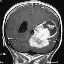

In [9]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/telraswa/Desktop/Swapnil/manju_project/TestImages/brain-tumors-fig2_large.jpg', target_size = (64, 64))
test_image

In [10]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[146., 146., 146.],
         [ 59.,  59.,  59.],
         [ 10.,  10.,  10.],
         ...,
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         [ 14.,  14.,  14.]],

        [[ 65.,  65.,  65.],
         [101., 101., 101.],
         [ 15.,  15.,  15.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        [[ 14.,  14.,  14.],
         [ 11.,  11.,  11.],
         [ 10.,  10.,  10.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        ...,

        [[120., 120., 120.],
         [  5.,   5.,   5.],
         [  9.,   9.,   9.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        [[174., 174., 174.],
         [ 85.,  85.,  85.],
         [193., 193., 193.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        [[ 13.,  13.,  13.],
       

In [11]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [12]:
training_set.class_indices

{'Benign': 0, 'Malignant': 1}

In [13]:
if result[0][0] == 0:
    prediction = 'Benign'
else:
    prediction = 'Malignent'
print("Detected tumor type is %s"%prediction)


Detected tumor type is Malignent
